In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # Khusus untuk menampilkan gambar di Colab

# Install opencv-contrib-python jika belum terinstall
!pip install opencv-contrib-python

In [10]:
from google.colab import files
uploaded = files.upload()


Saving Heretic.jpg to Heretic.jpg


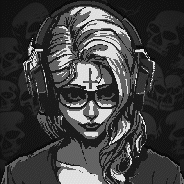

(184, 184)


In [11]:
# Load gambar (ganti dengan path gambar anda)
img = cv2.imread("Heretic.jpg", cv2.IMREAD_GRAYSCALE) # Load dalam grayscale untuk beberapa operasi

# Cek apakah gambar berhasil dimuat
if img is None:
  print("Error: Gambar tidak ditemukan!")
else:
  cv2_imshow(img) # Menampilkan gambar original
  print(img.shape)

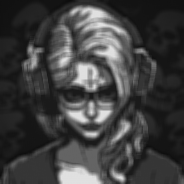

Analisis: Filter Moving Average menghaluskan gambar dengan merata-ratakan nilai piksel di sekitar area kernel. Efeknya adalah mengurangi noise dan detail halus.


In [12]:
# Membuat kernel untuk moving average
kernel_size = 5  # Ukuran kernel (ganjil)
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

# Mengaplikasikan filter
img_average = cv2.filter2D(img, -1, kernel)

cv2_imshow(img_average)
print("Analisis: Filter Moving Average menghaluskan gambar dengan merata-ratakan nilai piksel di sekitar area kernel. Efeknya adalah mengurangi noise dan detail halus.")

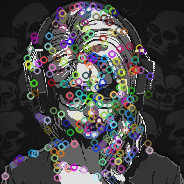

Analisis: SIFT mendeteksi fitur-fitur penting pada gambar yang invariant terhadap skala, rotasi, dan iluminasi. Titik-titik yang ditandai adalah keypoints, representasi matematis dari fitur-fitur tersebut.


In [13]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)

img_sift = cv2.drawKeypoints(img, keypoints, None)

cv2_imshow(img_sift)
print("Analisis: SIFT mendeteksi fitur-fitur penting pada gambar yang invariant terhadap skala, rotasi, dan iluminasi. Titik-titik yang ditandai adalah keypoints, representasi matematis dari fitur-fitur tersebut.")

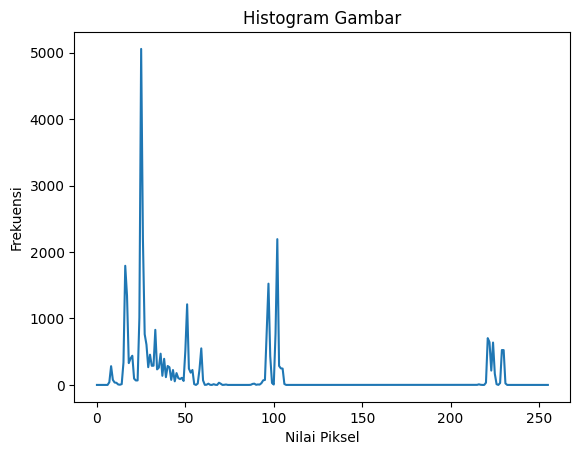

Analisis: Histogram menunjukkan distribusi intensitas piksel pada gambar.  Sumbu x mewakili nilai piksel (0-255 untuk grayscale), dan sumbu y mewakili frekuensi kemunculan nilai piksel tersebut.


In [14]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('Histogram Gambar')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')
plt.show()
print("Analisis: Histogram menunjukkan distribusi intensitas piksel pada gambar.  Sumbu x mewakili nilai piksel (0-255 untuk grayscale), dan sumbu y mewakili frekuensi kemunculan nilai piksel tersebut.")

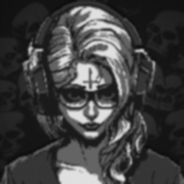

Analisis: Gaussian Smoothing mirip dengan Moving Average, tetapi menggunakan kernel Gaussian yang memberikan bobot lebih besar pada piksel di tengah kernel.  Hasilnya adalah penghalusan yang lebih smooth dibandingkan Moving Average.


In [15]:
img_gaussian = cv2.GaussianBlur(img, (5, 5), 0) # Kernel size (5, 5), sigma=0 (otomatis dihitung)

cv2_imshow(img_gaussian)
print("Analisis: Gaussian Smoothing mirip dengan Moving Average, tetapi menggunakan kernel Gaussian yang memberikan bobot lebih besar pada piksel di tengah kernel.  Hasilnya adalah penghalusan yang lebih smooth dibandingkan Moving Average.")

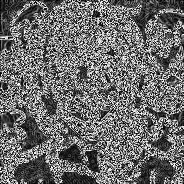

Analisis: Sobel Filter mendeteksi tepi pada gambar dengan menghitung gradien intensitas piksel.  Operator Sobel dalam arah x mendeteksi tepi vertikal, dan operator Sobel dalam arah y mendeteksi tepi horizontal.


In [16]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)
img_sobel = np.uint8(np.sqrt(abs_sobelx**2 + abs_sobely**2))


cv2_imshow(img_sobel)
print("Analisis: Sobel Filter mendeteksi tepi pada gambar dengan menghitung gradien intensitas piksel.  Operator Sobel dalam arah x mendeteksi tepi vertikal, dan operator Sobel dalam arah y mendeteksi tepi horizontal.")

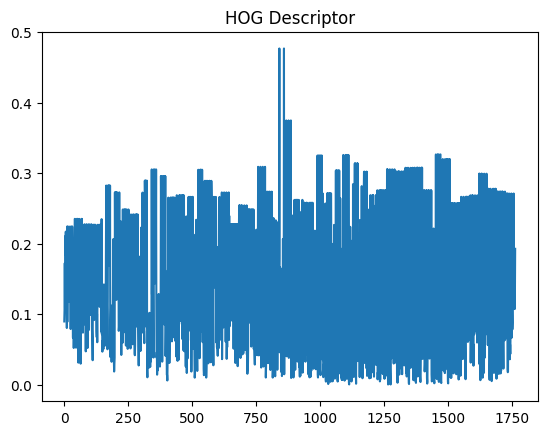

Analisis: HOG menggambarkan fitur dengan menghitung histogram orientasi gradien di dalam area lokal (cells) pada gambar.  HOG efektif untuk mendeteksi objek, khususnya pejalan kaki.


In [17]:
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(img,winStride,padding,locations)

plt.plot(hist)
plt.title('HOG Descriptor')
plt.show()
print("Analisis: HOG menggambarkan fitur dengan menghitung histogram orientasi gradien di dalam area lokal (cells) pada gambar.  HOG efektif untuk mendeteksi objek, khususnya pejalan kaki.")